In [2]:
Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.

whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

algo_returns.csv: Contains returns from the in-house trading algorithms from your company.

sp_tsx_history.csv: Contains historical closing prices of the S&P TSX 60 Index.

Identify and remove null values.

Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.

The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.

Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

SyntaxError: unterminated string literal (detected at line 3) (3921312497.py, line 3)

In [3]:

# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Cleaning the Data

In [4]:
# Read in data
csv_path =  Path("Starter_code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(csv_path, parse_dates=True, index_col='Date',infer_datetime_format=True)
#whale_returns['row_number'] = whale_returns.reset_index().index
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Read in data
csv_path2 =  Path("Starter_code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path2, parse_dates=True, index_col='Date',infer_datetime_format=True)
#algo_returns['row_number'] = algo_returns.reset_index().index
algo_returns.head()
# ,  index_col='Date'

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Read in data
# parse_dates=True, index_col="Date": to match the Date convention of the other data frames
csv_path3 =  Path("Starter_code/Resources/sp_tsx_history.csv")
sp_tsx =  pd.read_csv(csv_path3, parse_dates=True, index_col="Date", infer_datetime_format=True)
#sp_tsx =  pd.read_csv(csv_path3, infer_datetime_format=True)
#sp_tsx['row_number'] = sp_tsx.reset_index().index
sp_tsx

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [7]:
# Identifying null values
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
#Dropping null values in a copy of the original data frame to not alter it

whale_returns2 = whale_returns.dropna().copy() 
whale_returns2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [9]:
# Identifying null values
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
#Dropping null values in a copy of the original data frame to not alter it
algo_returns2 = algo_returns.dropna().copy() 
algo_returns2

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
# Identifying null values
sp_tsx.isnull().sum()

Close    0
dtype: int64

In [12]:
#Dropping null values in a copy of the original data frame to not alter it

sp_tsx2 = sp_tsx.dropna().copy() 
sp_tsx2

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [13]:

Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.

The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.


SyntaxError: invalid syntax (2953675299.py, line 1)

In [14]:
#checking data types
whale_returns2.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [15]:
#checking data types
algo_returns2.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [16]:
#checking data types
sp_tsx2.dtypes
# we need to change the Close data type from object to numeric

Close    object
dtype: object

In [17]:
# removing $ sign from Close column
sp_tsx2["Close"] = sp_tsx2["Close"].str.strip("$")
sp_tsx2

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [18]:
# removing commas, with commas it's impossible to convert to numeric type
sp_tsx2 = sp_tsx2.replace(',','', regex=True)
sp_tsx2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [19]:
# converting Close column to numeric type
sp_tsx2["Close"] = pd.to_numeric(sp_tsx2["Close"])
sp_tsx2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [20]:
#The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.
#1. create column daily returns
#2. input formula pct.change()



In [21]:
sp_tsx2.pct_change()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [22]:
# calculating daily returns with pct_chane() function and inputing result in the Daily Returns column, since we only have the Close column it will automaticcaly calculate daily returns from it no need ot do anything additional
sp_tsx2["S&P TSX"] = sp_tsx2.pct_change()
sp_tsx2


,Close,S&P TSX
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [23]:
#Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale_returns2, algo_returns2, sp_tsx2], axis="columns", join="inner")
df = df.drop(columns=['Close'])
df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


# Perform Quanitative Analysis

In [24]:
#calculating portfolio daily returns
# 3 portfolios: whale, algo, spx

# Shortcut for calculating returns
weights = [0.5, 0.5]
portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

msft_df.plot()

In [40]:
# daily returns whale portfolio with 4 equally weighted assets
weights1 = [0.25, 0.25, 0.25, 0.25]

whale_portfolio_returns = whale_returns2.dot(weights1)
whale_portfolio_returns

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
                ...   
2019-04-25   -0.000470
2019-04-26    0.010025
2019-04-29    0.003862
2019-04-30   -0.001867
2019-05-01   -0.005739
Length: 1059, dtype: float64

<Axes: title={'center': 'Daily Returns Whale Portfolio'}, xlabel='Date'>

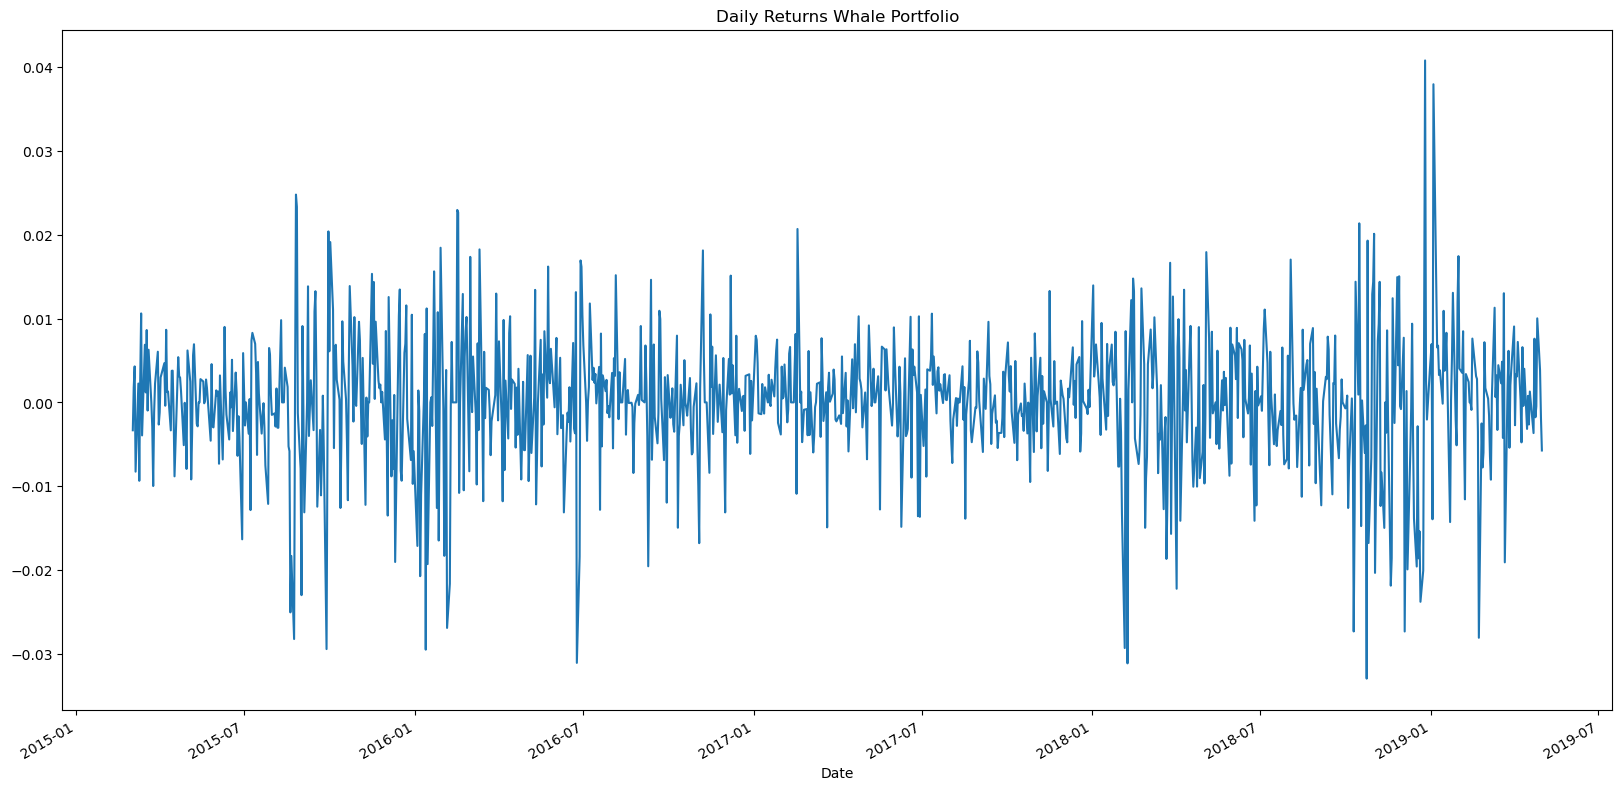

In [56]:
# plot daily returns over 5 years
whale_portfolio_returns.plot(figsize =(20,10), title="Daily Returns Whale Portfolio")

In [27]:
# daily returns trading algorithms portfolio for 2 equally weighted assets
weights2 = [0.5, 0.5]
algo_portfolio_returns = algo_returns2.dot(weights2)
algo_portfolio_returns

Date
2014-06-05    0.008674
2014-06-06    0.005070
2014-06-09    0.000328
2014-06-10    0.001835
2014-06-11    0.000499
                ...   
2019-04-25   -0.003282
2019-04-26    0.004118
2019-04-29    0.004019
2019-04-30   -0.002257
2019-05-01   -0.003632
Length: 1235, dtype: float64

<Axes: title={'center': 'Daily Returns Algo Portfolio'}, xlabel='Date'>

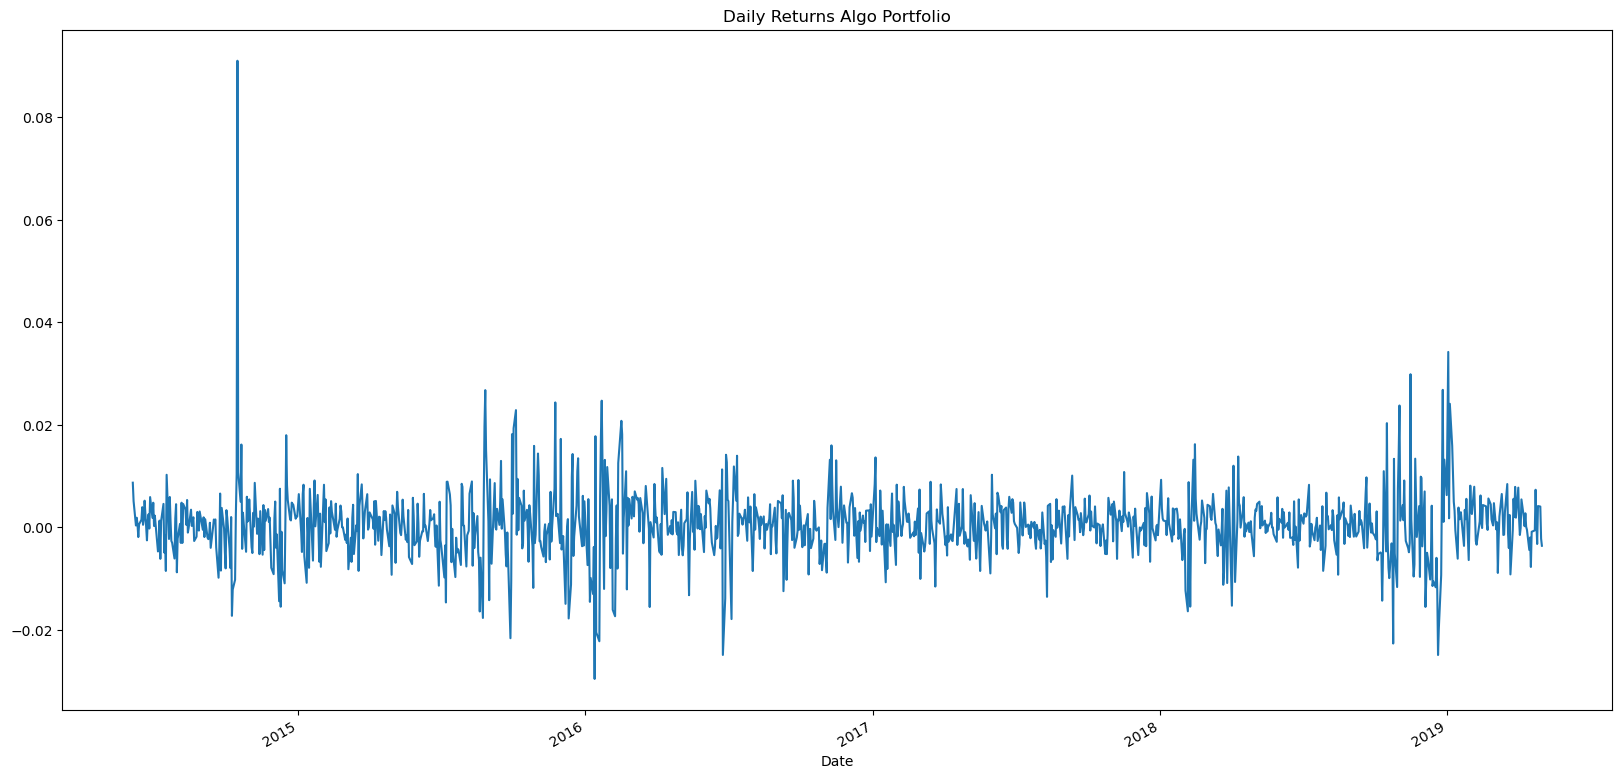

In [54]:
# plot daily returns over 5 years
algo_portfolio_returns.plot(figsize=(20,10), title= "Daily Returns Algo Portfolio")

In [29]:
# daily returns S&P TSX portfolio
sp_tsx_portfolio_returns = sp_tsx2.drop(columns=['Close'])
sp_tsx_portfolio_returns

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


<Axes: title={'center': 'Daily Returns S&P TSX Portfolio'}, xlabel='Date'>

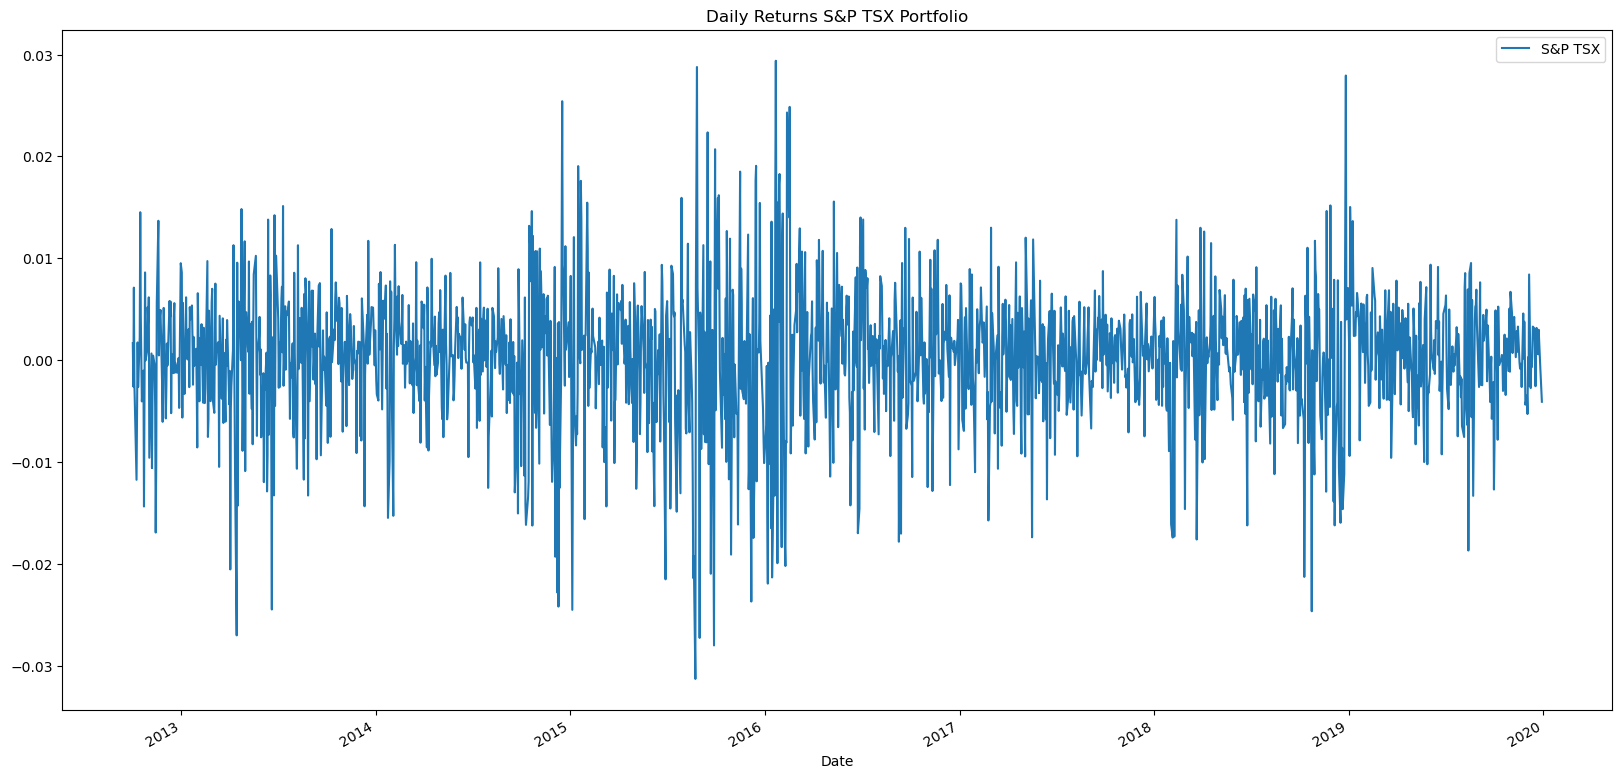

In [55]:
# plot daily returns over 5 years
sp_tsx_portfolio_returns.plot(figsize=(20,10), title="Daily Returns S&P TSX Portfolio")

# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

In [42]:
# Calculating the cumulative returns using the 'cumprod()' function
cummulative_whale_portfolio_returns = (1 + whale_portfolio_returns).cumprod()-1
cummulative_whale_portfolio_returns

Date
2015-03-03   -0.003328
2015-03-04   -0.001546
2015-03-05    0.002741
2015-03-06   -0.005547
2015-03-09   -0.003310
                ...   
2019-04-25    0.067706
2019-04-26    0.078410
2019-04-29    0.082574
2019-04-30    0.080553
2019-05-01    0.074352
Length: 1059, dtype: float64

In [33]:
# Calculating the cumulative returns using the 'cumprod()' function
cummulative_algo_portfolio_returns = (1 + algo_portfolio_returns).cumprod()-1
cummulative_algo_portfolio_returns

Date
2014-06-05    0.008674
2014-06-06    0.013788
2014-06-09    0.014121
2014-06-10    0.015982
2014-06-11    0.016489
                ...   
2019-04-25    0.793692
2019-04-26    0.801079
2019-04-29    0.808317
2019-04-30    0.804236
2019-05-01    0.797683
Length: 1235, dtype: float64

In [34]:
# Calculating the cumulative returns using the 'cumprod()' function
cummulative_sp_tsx_portfolio_returns = (1 + sp_tsx_portfolio_returns).cumprod()-1
cummulative_sp_tsx_portfolio_returns

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.000867
2012-10-04,0.006264
2012-10-05,0.003945
...,...
2019-12-20,0.383846
2019-12-23,0.384676
2019-12-24,0.388835


# plotting all portfolio cummulative returns on the same graph to compare them to the S&P TSX portfolio
whale_returns2
weights1 = [0.25, 0.25, 0.25, 0.25]
algo_returns2
weights2 = [0.5, 0.5]

sp_tsx2

cummulative_whale_portfolio_returns = (1 + (whale_returns2.dot(weights1))).cumprod()-1
cummulative_algo_portfolio_returns = (1 + (algo_returns2.dot(weights2))).cumprod()-1
cummulative_sp_tsx_portfolio_returns = (1 + (sp_tsx2.drop(columns=['Close']))).cumprod()-1

comparison_portfolio = pd.DataFrame({
    "Whale": cummulative_whale_portfolio_returns,
    "Algo": cummulative_algo_portfolio_returns,
    "S&P": cummulative_sp_tsx_portfolio_returns
})
comparison_portfolio.plot()

portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

all_portfolios.plot(figsize=(20, 10), title="Daily Returns")

<Axes: title={'center': 'Cummulative Returns Whale Portfolio'}, xlabel='Date'>

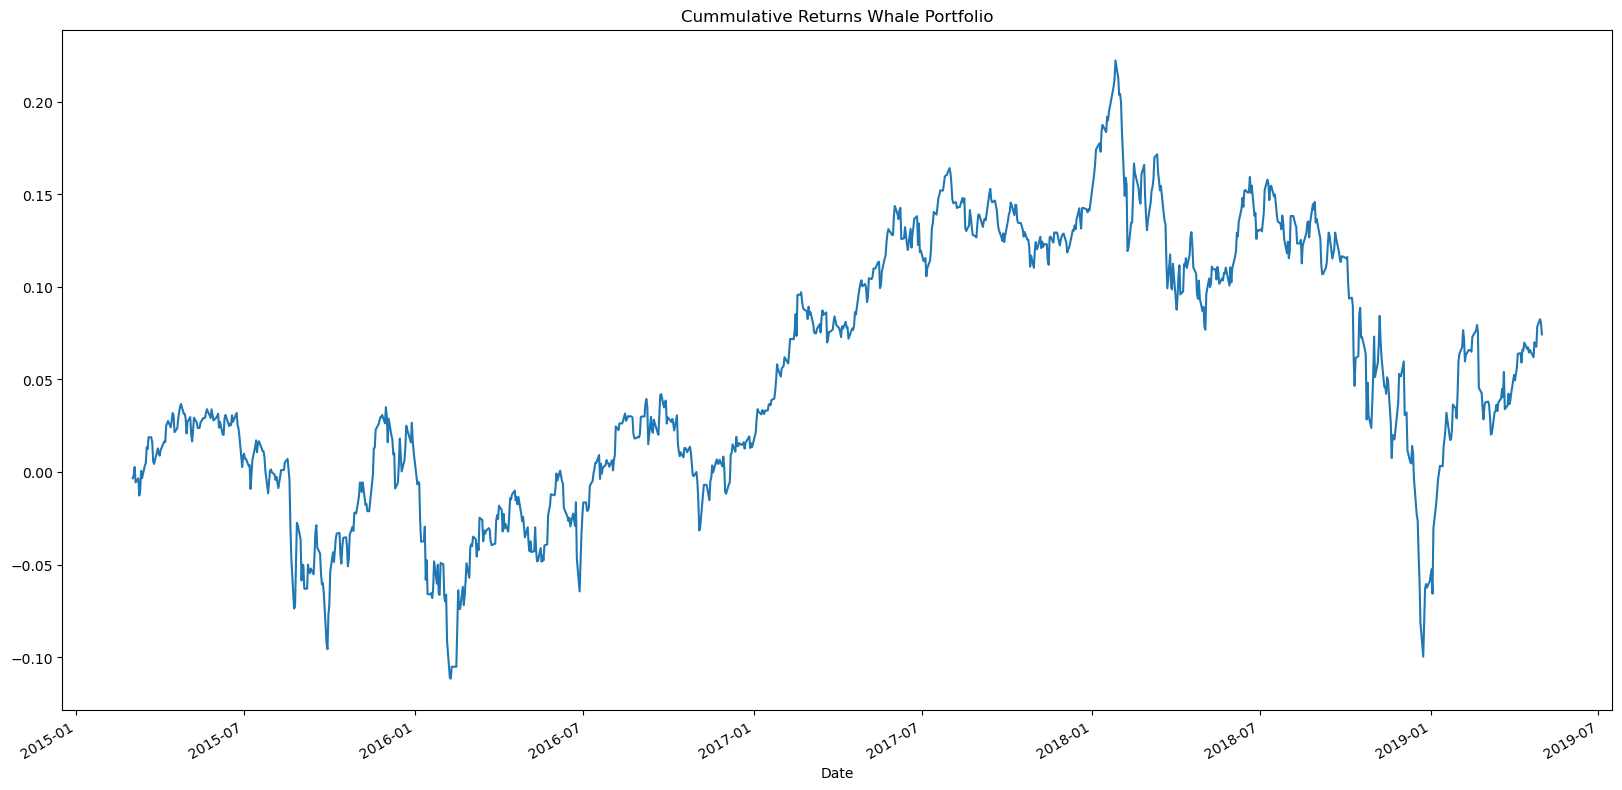

In [46]:
# Plot cumulative returns
cummulative_whale_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns Whale Portfolio")

<Axes: title={'center': 'Cummulative Returns Algo Portfolio'}, xlabel='Date'>

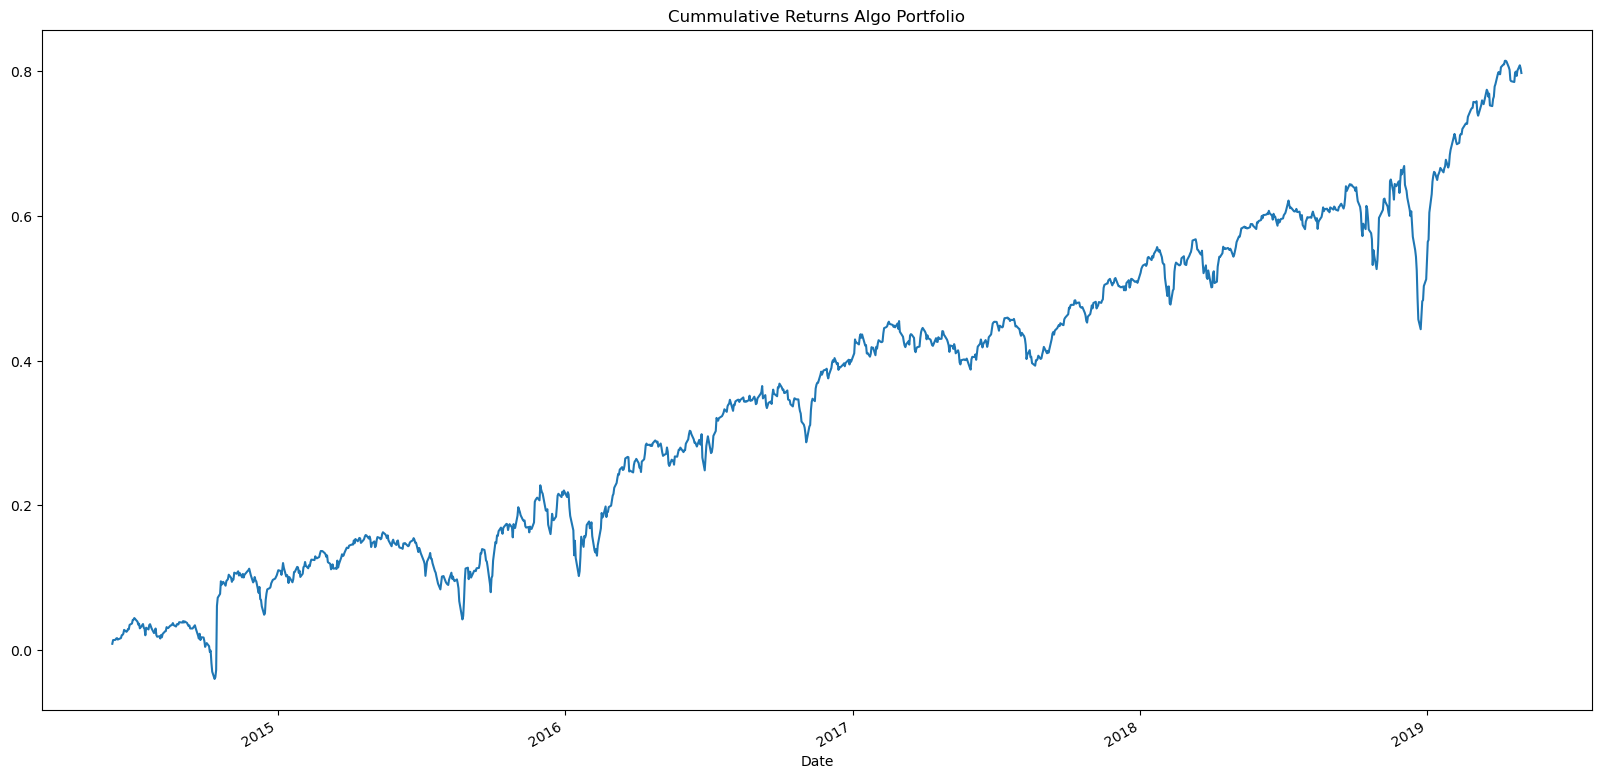

In [47]:
cummulative_algo_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns Algo Portfolio")

<Axes: title={'center': 'Cummulative Returns S&P TSX Portfolio'}, xlabel='Date'>

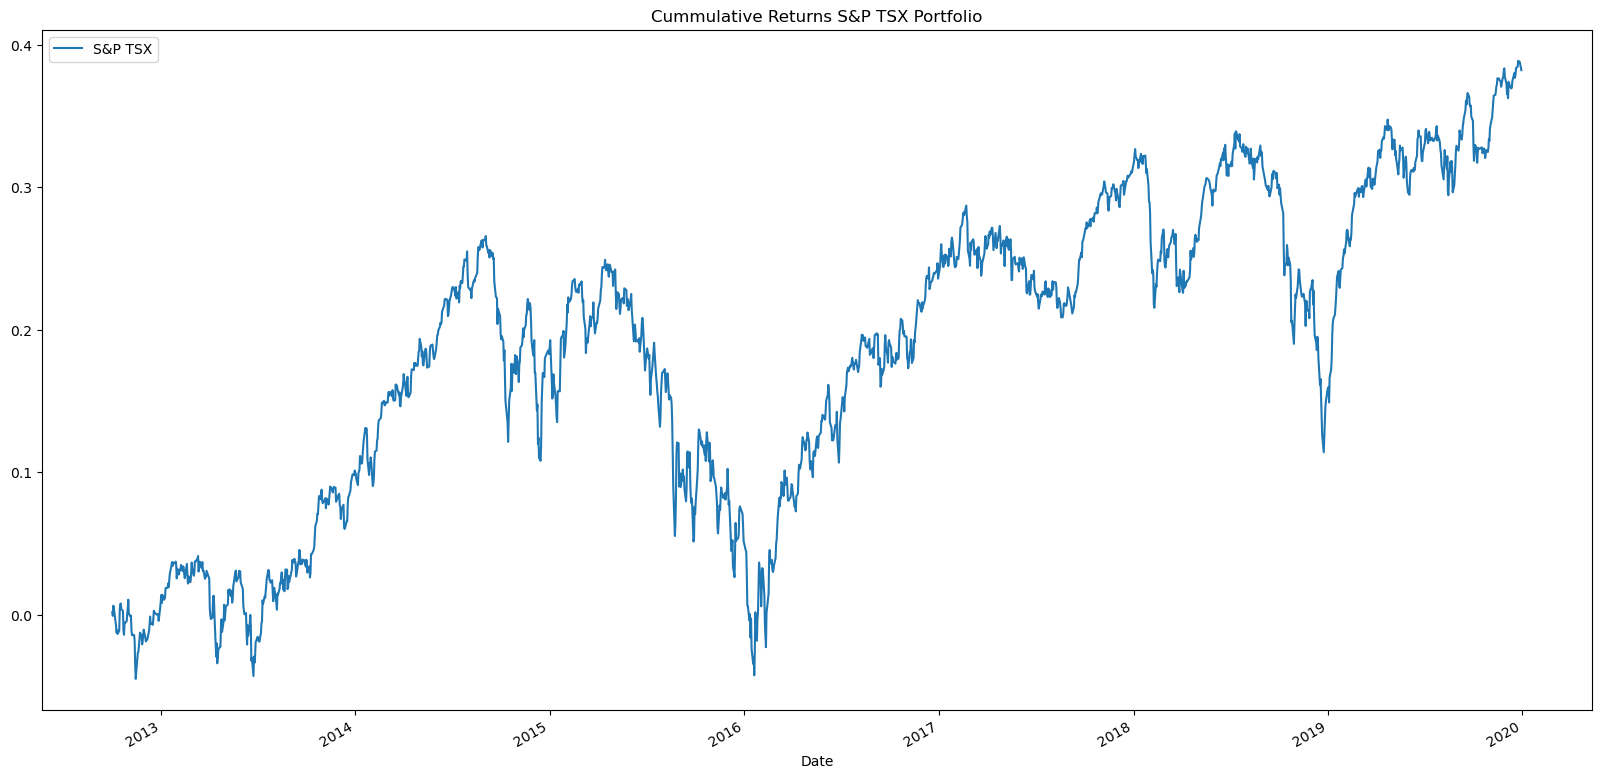

In [48]:
cummulative_sp_tsx_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns S&P TSX Portfolio")

## The cummulative return of the Algo portfolio outperforms the S&P TSX portfolio by 41.54% (0.797683-0.382239)

# Risk Analysis

In [ ]:
# Box plot to visually show risk: wider spread of returns induces greater risks for the investor
# Create a box plot for each of the returns.
portfolio_std.plot.box()


<Axes: title={'center': 'Whale Box Plot'}>

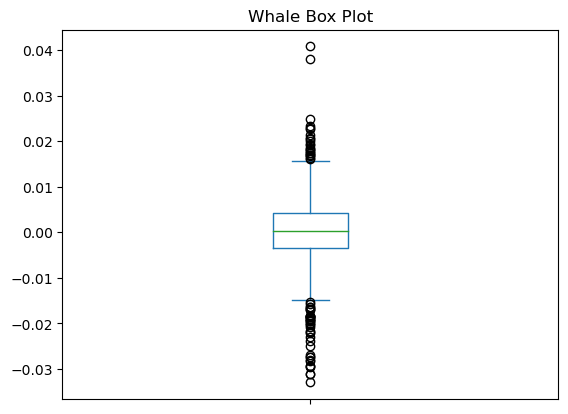

In [75]:
# Create a box plot for each of the returns.
whale_portfolio_returns.plot.box(title = "Whale Box Plot")

### 50% of the daily returns are concentrated between -0.5% and 0.5%, with a minimum of -1.5% and a maximum of 1.5% indicated by both tails of the boxplot.
### There's a large number of outliers, which indicates a large deviation from average daily returns. Especially for higher returns with the two highest outliers at around 4%.
### Given the large amount of outliers, which entails great variations in daily returns, I assume the whale portfolio is RISKY.

<Axes: title={'center': 'Algo Box Plot'}>

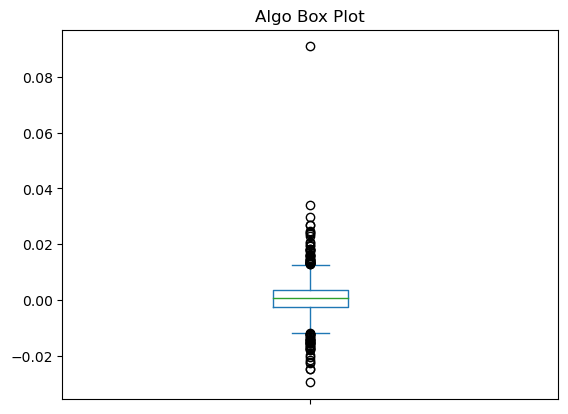

In [76]:
algo_portfolio_returns.plot.box(title = "Algo Box Plot")

### The algo portoflio returns are more concentrated, as we can see from the smaller box. 50% of daily returns range from -1% to 0% and 50% from 0 to 1%.
### There's also a large amount of outliers, but also concentrated, with the exception of 1 abnormally high outlier with a daily return of 9%.
### Looking at the distribution of daily returns, I assume that the algo portfolio would have the lowest risk since returns are highly concentrated, but the abmormally high outlier at 9% can cunterbalance the result.

<Axes: title={'center': 'S&P TSX Box Plot'}>

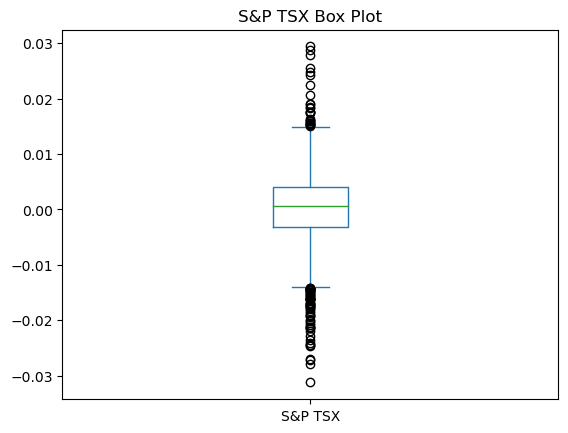

In [77]:
sp_tsx_portfolio_returns.plot.box(title = "S&P TSX Box Plot")

### The shape of the distribution of the S&P TSX  returns looks symmetric. Outliers on lower and upper sides are relatively even, the lowest outlier reaches -3% and the highest 3%. 50% of daily returns range from -1.5% to 0%, and 50% from 0 to 1.5%.
### Given this distribution that appears to be a Normal distribution, the S&P TSX portfolio should have a low volatility.

In [ ]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()


In [64]:
# Calculate the daily standard deviations of all portfolios
whale_daily_std = whale_portfolio_returns.std()
whale_daily_std

0.007894995212497506

In [65]:
# Calculate the daily standard deviations of all portfolios
algo_daily_std = algo_portfolio_returns.std()
algo_daily_std

0.006752030964420841

In [67]:
# Calculate the daily standard deviations of all portfolios
sp_tsx_daily_std = sp_tsx_portfolio_returns.std()
sp_tsx_daily_std

S&P TSX    0.006637
dtype: float64

### Both portfolios are riskier than the S&P TSX 60, since their respective standard deviations, or volatility, are greater than the S&P. 
### This is against my first assumption that the algo portfolio would be the safest one since the spread in its daily returns was highly concentrated. In the algo potfolio, the abnormally high outlier at 9% represents a huge spread from mean returns, large enough to significantly increase the portfolio's volatility. 
### I assume that without this outlier the standard deviation of algo would be lower than the S&P. 

In [ ]:
# annualized_std = daily_std * np.sqrt(252)


In [72]:
# Calculate the annualized standard deviation (252 trading days)
whale_annualized_std = whale_daily_std * np.sqrt(252)
whale_annualized_std

0.12532916360588367

In [73]:
algo_annualized_std = algo_daily_std * np.sqrt(252)
algo_annualized_std

0.10718516865879092

In [74]:
sp_tsx_annualized_std = sp_tsx_daily_std * np.sqrt(252)
sp_tsx_annualized_std

S&P TSX    0.105365
dtype: float64